In [1]:
### uncomment to display figures
%matplotlib inline

# Demonstrates benchmarking functionality - SASMAS Soil Moisture

#### Benchmarking dataset information
The soil moisture content (in mm) dataset consists of time-series of soil water content reflectometer measurements at various depths within the profile (top:0-5cm, shallow:0-30cm, middle:30-60cm, deep:60-90cm) within the Upper Hunter River
<br>
##### Source:
Rüdiger, C., Hancock, G., Hemakumara, H.M., Jacobs, B., Kalma, J.D., Martinez, C., Thyer, M., Walker, J.P., Wells, T. and Willgoose, G.R., 2007. Goulburn River experimental catchment data set. Water Resources Research, 43(10): W10403.

This notebook goes through the following steps:

1. Import required libraries
2. Set up benchmarking configuration <br>
 2.1 Catchments to be benchmarked<br>
 2.2 Define observation inputs<br>

3. Create benchmark object<br>
4. Add models to be benchmarked <br>
 4.1 Select or unselect models<br> 
5. View benchmarking statistics<br>
6. View benchmarking plots<br>
7. Statistics plotting<br>

### 1. Import required libraries

In [2]:
from awrams.benchmarking.benchmark import BenchmarkSoilMoisture
from awrams.utils import datetools as dt
import awrams.benchmarking.meta.sasmas as sasmas

from awrams.utils import config_manager
    
sys_profile = config_manager.get_system_profile().get_settings()
TRAINING_DATA_PATH = sys_profile['DATA_PATHS']['TRAINING_DATA']

### 2.  Set up benchmarking configuration
Comparison against observed streamflow <br>
You can use your own data in csv form similar to the example provided. <br>
It just needs to have column names matching the names used in extracting AWRA data

#### 2.1 Sites to be benchmarked
Soil moisture comparisons at SASMAS sites

In [3]:
sasmas_data_path = TRAINING_DATA_PATH + '/benchmarking/sasmas/' #  # the sasmas data has been pre-processed into 5 files [top, shallow, middle, deep, profile]

site_list = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'M1', 'M2', 'M3', 
             'M4', 'M5', 'M6', 'M7', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']

mod_site_list = ['SASMAS Soil moisture_' + site for site in site_list]

### 3.  Create the benchmark object:<br> 

An object of "Benchmark" class is created by defining what variable is to be benchmarked. 
Everything else gets progressively added,  and statistics are calculated when the observation and model outputs are added.

In [4]:
sas = BenchmarkSoilMoisture("SASMAS", "soil moisture", sasmas.meta)

# Specify benchmarking period
sas.period = dt.dates('2003-2011')

# Add observations and catchment subset [the id list needs to be present in the column names of the observation file]
sas.load(sasmas_data_path,mod_site_list,convert_units=100.)

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:39: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  self.obs.monthly = self.obs.data.resample(rule='m', how=self.aggr_how)
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:40: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  self.obs.annual = self.obs.data.resample(rule='A', how=self.aggr_how)


In [5]:
sorted(sas.sites)

['G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'K1',
 'K2',
 'K3',
 'K4',
 'K5',
 'K6',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'S1',
 'S2',
 'S3',
 'S4',
 'S5',
 'S6',
 'S7']

In [7]:
sys_profile['BENCHMARKING']['MONTHLY_REJECTION_THRESHOLD'] = 15 # Minimum number of available obs days before monthly stats are calculated

In [8]:
sys_profile['BENCHMARKING']['SM_MODEL_VARNAMES']

['s0_avg', 'ss_avg', 'sd_avg']

In [9]:
sys_profile['BENCHMARKING']['SM_MODEL_LAYERS']

s0_avg: 100.0
sd_avg: 5000.0
ss_avg: 900.0

### 4. Add models to be benchmarked
Any number of models can be simulataneously compared
This step processes the data and calculates all the statistics [can take a while]

In [10]:
path = sasmas_data_path+"/awral_${v}.csv"
sas.add_model("AWRAMSI.v4_0.AWRAL", csv_path=path)

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:156: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  monthly_data = cur_data[valid_idx].resample(rule='m', how=how)
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:181: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  out_dct[col] = ts.resample(annual_rule, how)
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/stats.py:305: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1-r*r)*ssym / ssxm / df)
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/stats.py:301: RuntimeWarning: invalid value encountered in sqrt
  t = r*np.sqrt(df/((1.0-r+TINY)*(1.0+r+TINY)))
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/stats.py:303: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/biancag/miniconda

In [11]:
path = sasmas_data_path+"/AWRAMSI_v5QES_AWRAL_SASMAS_${v}.csv" 
sas.add_model("AWRAMSI.v5_0.AWRAL", csv_path=path)

#### 4.1 Show list of loaded or selected models
list of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [12]:
sas.benchmark.top.selection

['AWRAMSI.v4_0.AWRAL', 'AWRAMSI.v5_0.AWRAL']

### 5. View benchmarking statistics
Summary percentiles can be printed out by specifying a statistic from: <br> 
"grand_f", "nse", "bias_relative", "pearsons_r" (default), "mean"  <br>
to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

These tables are pandas dataframes, so they can be exported to csv

In [13]:
sas.benchmark.deep.stat_percentiles('fobj',freq='m')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI.v4_0.AWRAL,-39.311670,-28.419589,-4.702764,-0.865533,0.003508,0.295332,0.337866
AWRAMSI.v5_0.AWRAL,-37.453677,-27.232047,-9.412071,-0.334909,0.048118,0.192303,0.379138


In [14]:
sas.benchmark.deep.stat_percentiles('grand_f',freq='m')

,grand_f
AWRAMSI.v4_0.AWRAL,-1.306731
AWRAMSI.v5_0.AWRAL,-2.329931


In [15]:
sas.benchmark.top.stat_percentiles('bias')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI.v4_0.AWRAL,-17.979761,-9.581304,3.672289,5.710757,11.019130,19.416488,27.046755
AWRAMSI.v5_0.AWRAL,-13.396462,-6.787781,6.314908,11.609370,15.732427,21.533697,27.628313


In [16]:
sas.benchmark.shallow.stat_percentiles('nse','daily')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI.v4_0.AWRAL,-12.492390,-6.372495,-1.226377,-0.406539,0.149825,0.274793,0.335759
AWRAMSI.v5_0.AWRAL,-12.629978,-8.849392,-1.439391,-0.425125,0.023922,0.314073,0.413683


In [17]:
sas.benchmark.shallow.data_percentiles()

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:369: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  obs_series = self.obs.data.resample(rule=pd_tf, how=self.aggr_how).mean().values.flatten()


,0%,5%,25%,50%,75%,95%,100%
SASMAS,5.364505,6.171731,16.176131,20.084465,25.148694,38.670820,57.725726
AWRAMSI.v4_0.AWRAL,10.607371,12.699266,14.602201,29.082758,30.641937,34.203634,37.278064
AWRAMSI.v5_0.AWRAL,13.538079,15.263139,16.692216,31.305878,32.225597,37.939658,39.481325


### 6. View benchmarking plots [time series, Regression]

specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments

In [18]:
sas.benchmark.top.selection

['AWRAMSI.v4_0.AWRAL', 'AWRAMSI.v5_0.AWRAL']

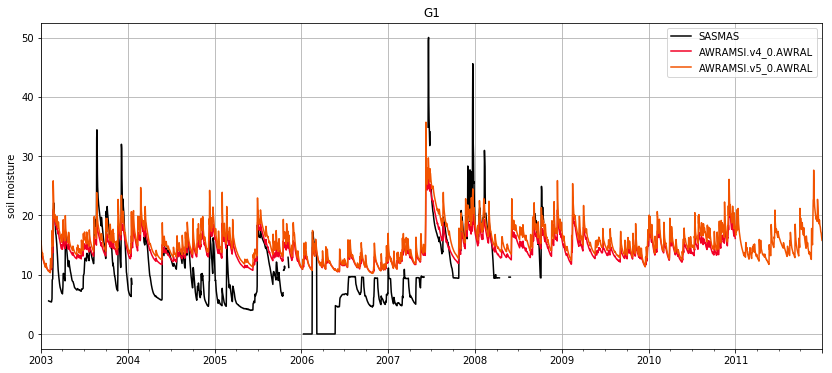

In [19]:
p = sas.benchmark.shallow.plot_timeseries('G1','raw')

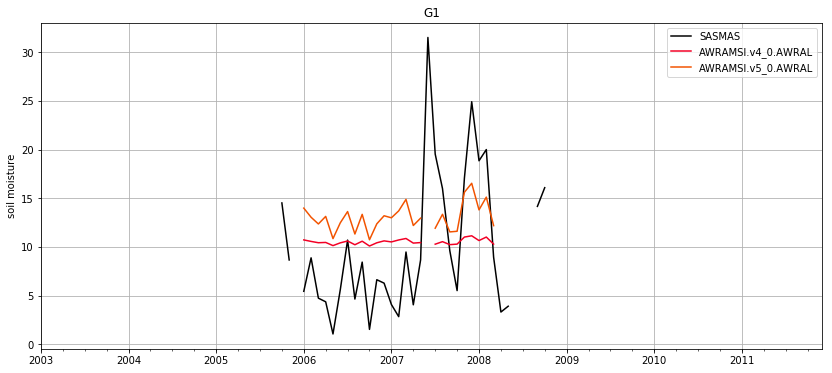

In [20]:
p = sas.benchmark.top.plot_timeseries('G1')

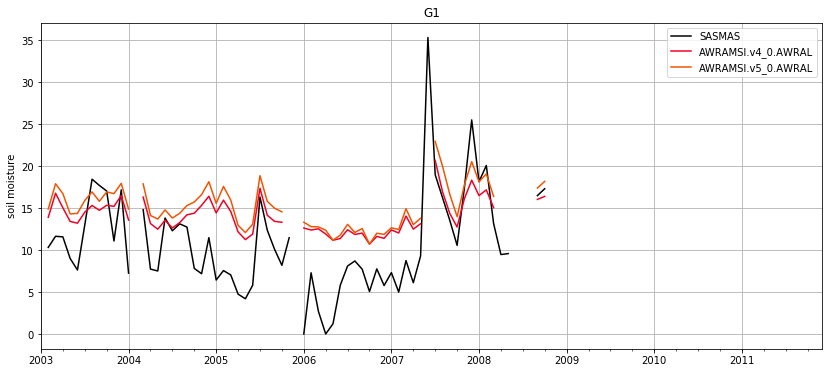

In [21]:
p = sas.benchmark.shallow.plot_timeseries('G1')

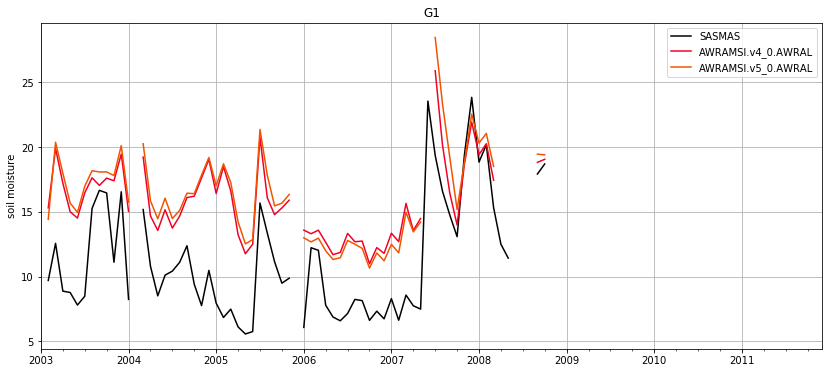

In [22]:
p = sas.benchmark.middle.plot_timeseries('G1')

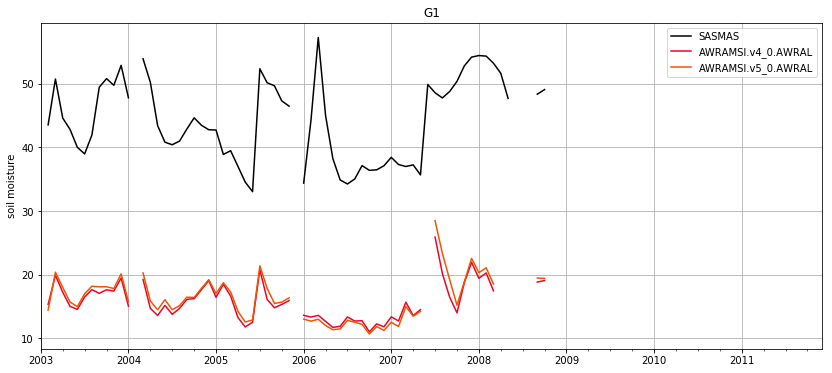

In [23]:
p = sas.benchmark.deep.plot_timeseries('G1')

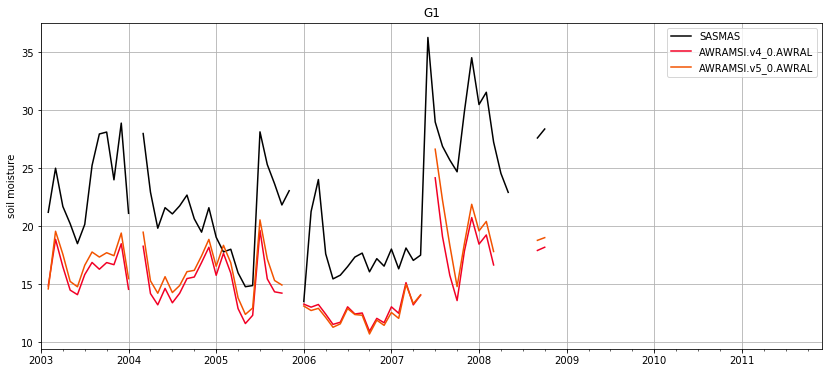

In [24]:
p = sas.benchmark.profile.plot_timeseries('G1')

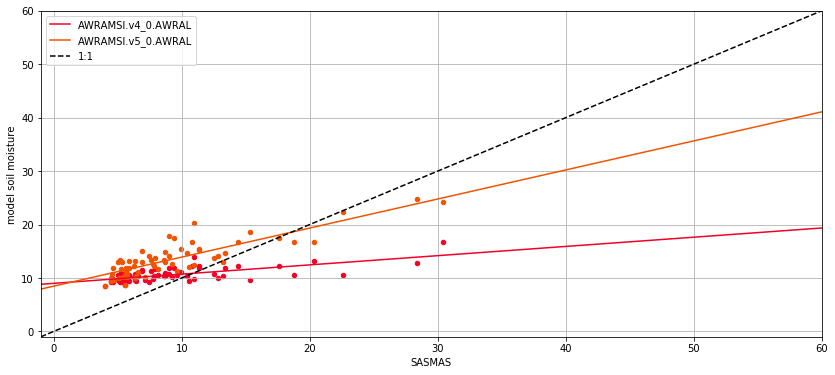

In [25]:
p = sas.benchmark.shallow.plot_regression('M1',xlim=[-1,60],ylim=[-1,60])

### 7. Statistics plotting
specify statistic type from "fobj", "nse", "rmse", "bias_relative", "pearsons_r" (default), "mean" and <br> frequency from 'd', 'm', 'y'

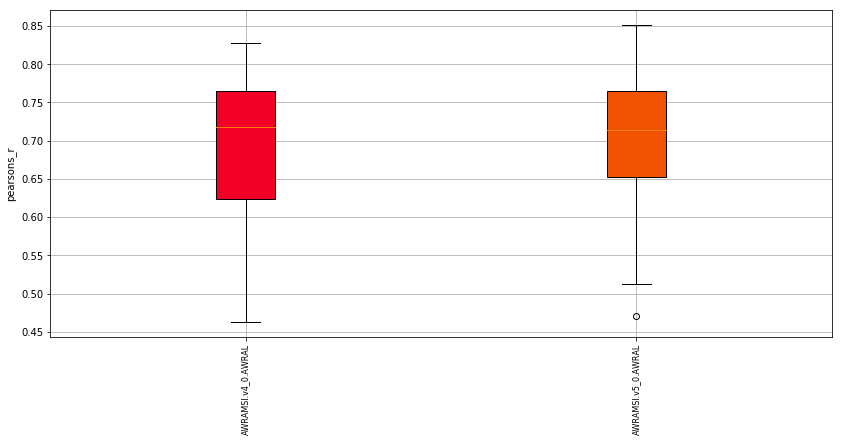

In [26]:
p = sas.benchmark.shallow.plot_box('pearsons_r','daily')

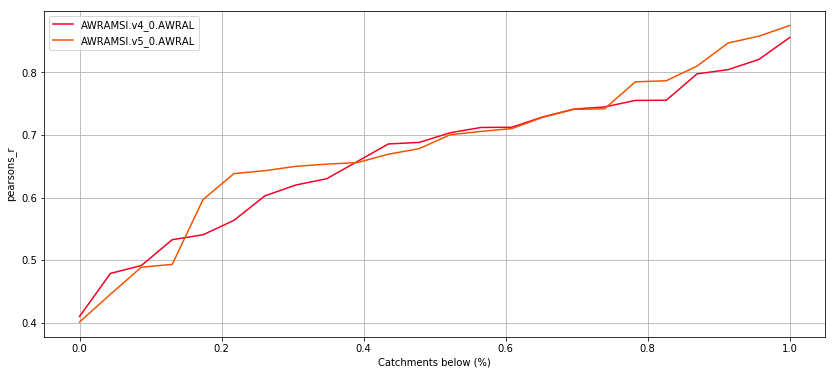

In [27]:
p = sas.benchmark.shallow.plot_cdf('pearsons_r')

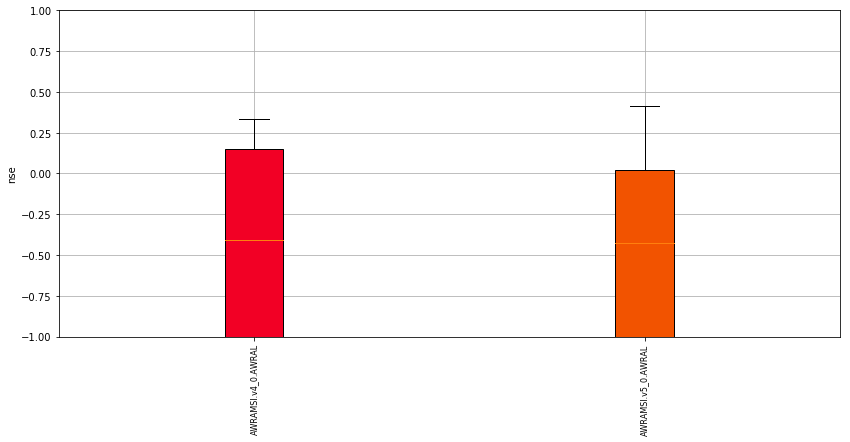

In [28]:
p = sas.benchmark.shallow.plot_box('nse','daily',ylim=[-1,1])